## Neo4j

In [2]:
!pip install neo4j

     -------------------------------------- 301.7/301.7 kB 6.2 MB/s eta 0:00:00


In [14]:
from neo4j import GraphDatabase

# Connection details
uri = "neo4j+s://aa060944.databases.neo4j.io"  # Replace with your Bolt URL
username = "neo4j"
password = "6k15br_jiyGv8_8KXEfnkLhg5STQ-9MaP3y-GZKJ5Nc"

In [15]:

# Entity-Relationship Triplets
triplets = [
    ("Diabetes", "causes", "Neuropathy"),
    ("Diabetes", "increases risk of", "Kidney Disease"),
    ("Diabetes", "treated with", "Metformin"),
    ("Diabetes", "managed by", "Lifestyle Changes"),
    ("Kidney Disease", "leads to", "Dialysis Requirement"),
    ("Kidney Disease", "caused by", "Hypertension"),
    ("Hypertension", "increases risk of", "Heart Disease"),
    ("Hypertension", "treated with", "ACE Inhibitors"),
    ("Heart Disease", "leads to", "Heart Failure"),
    ("Heart Disease", "caused by", "High Cholesterol"),
    ("High Cholesterol", "treated with", "Statins"),
    ("High Cholesterol", "linked to", "Obesity"),
    ("Obesity", "causes", "Diabetes"),
    ("Obesity", "managed by", "Exercise"),
    ("Exercise", "reduces risk of", "Hypertension"),
    ("Exercise", "recommended for", "Heart Health"),
    ("Smoking", "causes", "Lung Cancer"),
    ("Smoking", "increases risk of", "Heart Disease"),
    ("Lung Cancer", "treated with", "Chemotherapy"),
    ("Chemotherapy", "causes", "Fatigue"),
    ("Fatigue", "managed by", "Physical Therapy"),
    ("Physical Therapy", "recommended for", "Muscle Weakness"),
    ("Muscle Weakness", "associated with", "Vitamin D Deficiency"),
    ("Vitamin D Deficiency", "causes", "Osteoporosis"),
    ("Osteoporosis", "leads to", "Bone Fractures"),
    ("Bone Fractures", "treated with", "Calcium Supplements"),
    ("Calcium Supplements", "recommended for", "Osteoporosis"),
    ("Diabetes", "causes", "Retinopathy"),
    ("Retinopathy", "treated with", "Laser Therapy"),
    ("Laser Therapy", "used in", "Ophthalmology"),
    ("Ophthalmology", "treats", "Vision Disorders"),
    ("Kidney Disease", "linked to", "High Blood Pressure"),
    ("High Blood Pressure", "causes", "Stroke"),
    ("Stroke", "treated with", "Rehabilitation Therapy"),
    ("Rehabilitation Therapy", "improves", "Motor Function"),
    ("Motor Function", "affected by", "Nerve Damage"),
    ("Nerve Damage", "caused by", "Diabetes"),
    ("Heart Disease", "causes", "Chest Pain"),
    ("Chest Pain", "diagnosed by", "ECG"),
    ("ECG", "used in", "Cardiology"),
    ("Cardiology", "treats", "Heart Disorders"),
    ("Heart Disorders", "linked to", "Hypertension"),
    ("Hypertension", "monitored by", "Blood Pressure Monitors"),
    ("Blood Pressure Monitors", "recommended for", "Home Monitoring"),
    ("Obesity", "linked to", "Sleep Apnea"),
    ("Sleep Apnea", "managed by", "CPAP Machines"),
    ("CPAP Machines", "improve", "Breathing Patterns"),
    ("Breathing Patterns", "affected by", "Asthma"),
    ("Asthma", "triggered by", "Airborne Allergens"),
    ("Airborne Allergens", "include", "Pollen"),
    ("Pollen", "causes", "Seasonal Allergies"),
    ("Seasonal Allergies", "treated with", "Antihistamines"),
    ("Antihistamines", "reduce", "Allergic Reactions"),
    ("Allergic Reactions", "cause", "Skin Rashes"),
    ("Skin Rashes", "treated with", "Topical Creams"),
    ("Topical Creams", "recommended for", "Eczema"),
    ("Eczema", "causes", "Skin Irritation"),
    ("Skin Irritation", "managed by", "Moisturizers"),
    ("Moisturizers", "reduce", "Dry Skin"),
    ("Dry Skin", "linked to", "Dehydration"),
    ("Dehydration", "caused by", "Heat Stroke"),
    ("Heat Stroke", "managed by", "Rehydration Therapy"),
    ("Rehydration Therapy", "prevents", "Electrolyte Imbalance"),
    ("Electrolyte Imbalance", "causes", "Muscle Cramps"),
    ("Muscle Cramps", "treated with", "Magnesium Supplements"),
    ("Magnesium Supplements", "recommended for", "Muscle Health"),
    ("Muscle Health", "improved by", "Exercise"),
    ("Exercise", "recommended for", "Weight Management"),
    ("Weight Management", "reduces risk of", "Diabetes"),
    ("Diabetes", "causes", "Peripheral Neuropathy"),
    ("Peripheral Neuropathy", "treated with", "Pain Relievers"),
    ("Pain Relievers", "used for", "Chronic Pain"),
    ("Chronic Pain", "managed by", "Physical Therapy"),
    ("Physical Therapy", "improves", "Joint Mobility"),
    ("Joint Mobility", "reduced by", "Arthritis"),
    ("Arthritis", "treated with", "Anti-Inflammatory Drugs"),
    ("Anti-Inflammatory Drugs", "reduce", "Joint Swelling"),
    ("Joint Swelling", "causes", "Reduced Mobility"),
    ("Reduced Mobility", "managed by", "Assistive Devices"),
    ("Assistive Devices", "recommended for", "Elderly Patients"),
    ("Elderly Patients", "at risk of", "Osteoporosis"),
    ("Osteoporosis", "causes", "Fractures"),
    ("Fractures", "treated with", "Bone Grafts"),
    ("Bone Grafts", "used in", "Orthopedic Surgery"),
    ("Orthopedic Surgery", "required for", "Severe Fractures"),
    ("Severe Fractures", "lead to", "Reduced Quality of Life"),
    ("Reduced Quality of Life", "improved by", "Rehabilitation Therapy"),
    ("Rehabilitation Therapy", "supports", "Mental Health"),
    ("Mental Health", "affected by", "Chronic Illness"),
    ("Chronic Illness", "linked to", "Depression"),
    ("Depression", "treated with", "SSRIs"),
    ("SSRIs", "used for", "Anxiety Disorders"),
    ("Anxiety Disorders", "cause", "Sleep Disturbances"),
    ("Sleep Disturbances", "managed by", "Melatonin Supplements"),
    ("Melatonin Supplements", "improve", "Sleep Quality"),
    ("Sleep Quality", "linked to", "Mental Well-being"),
    ("Mental Well-being", "improved by", "Exercise"),
    ("Exercise", "benefits", "Cardiovascular Health"),
    ("Cardiovascular Health", "enhanced by", "Heart-Healthy Diet"),
    ("Heart-Healthy Diet", "reduces", "Cholesterol Levels"),
    ("Cholesterol Levels", "monitored by", "Blood Tests"),
    ("Blood Tests", "used to", "Diagnose Conditions"),
    ("Conditions", "include", "Diabetes"),
]

# Connect to Neo4j
driver = GraphDatabase.driver(uri, auth=(username, password))

def insert_triplets(tx, triplets):
    for entity1, relation, entity2 in triplets:
        query = """
        MERGE (a:Entity {name: $entity1})
        MERGE (b:Entity {name: $entity2})
        MERGE (a)-[:RELATION {name: $relation}]->(b)
        """
        tx.run(query, entity1=entity1, relation=relation, entity2=entity2)

# Insert triplets
with driver.session() as session:
    session.write_transaction(insert_triplets, triplets)

print("Knowledge graph created successfully!")
driver.close()


C:\Users\Yashna Satyan\AppData\Local\Temp\ipykernel_28968\3870735120.py:122: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(insert_triplets, triplets)


Knowledge graph created successfully!


### Traversal Checking

In [1]:
!pip install neo4j transformers sentence-transformers faiss-cpu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cached-path 1.1.6 requires huggingface-hub<0.11.0,>=0.8.1, but you have huggingface-hub 0.26.5 which is incompatible.
allennlp 2.10.1 requires transformers<4.21,>=4.1, but you have transformers 4.33.3 which is incompatible.



     --------------------------------------- 14.6/14.6 MB 11.1 MB/s eta 0:00:00
     --------------------------------------- 10.0/10.0 MB 12.3 MB/s eta 0:00:00
     ------------------------------------- 447.8/447.8 kB 14.1 MB/s eta 0:00:00
  Using cached transformers-4.46.2-py3-none-any.whl (10.0 MB)
     --------------------------------------- 10.0/10.0 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 12.9 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 9.5/9.5 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 9.5/9.5 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 9.5/9.5 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 9.4/9.4 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 9.4/9.4 MB 4.8 MB/s eta 

In [6]:
!pip install --upgrade transformers==4.30.2
!pip install --upgrade sentence-transformers==2.2.2

     ---------------------------------------- 7.2/7.2 MB 1.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.33.3
    Uninstalling transformers-4.33.3:
      Successfully uninstalled transformers-4.33.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 2.6.1 requires transformers<5.0.0,>=4.32.0, but you have transformers 4.30.2 which is incompatible.
allennlp 2.10.1 requires transformers<4.21,>=4.1, but you have transformers 4.30.2 which is incompatible.


     -------------------------------------- 86.0/86.0 kB 112.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125960 sha256=906576b183458bf333f25a90fa4380836a4c1752e93df7971a5e08e2161e234c
  Stored in directory: c:\users\yashna satyan\appdata\local\pip\cache\wheels\30\b4\1c\7509ecb4c391a7be4cdf2ff04df077a568cd52471007e436e6
Successfully built sentence-transformers
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 2.6.1
    Uninstalling sentence-transformers-2.6.1:
      Successfully uninstalled sentence-transformers-2.6.1


In [18]:
!pip show transformers
!pip show sentence-transformers

Name: transformers
Version: 4.30.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: c:\users\yashna satyan\.conda\envs\spacy_env\lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: allennlp, sentence-transformers
Name: sentence-transformers
Version: 2.2.2
Summary: Multilingual text embeddings
Home-page: https://github.com/UKPLab/sentence-transformers
Author: Nils Reimers
Author-email: info@nils-reimers.de
License: Apache License 2.0
Location: c:\users\yashna satyan\.conda\envs\spacy_env\lib\site-packages
Requires: huggingface-hub, nltk, numpy, scikit-learn, scipy, sentencepiece, torch, torch

In [20]:
!pip install huggingface-hub==0.23.2

     -------------------------------------- 401.7/401.7 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cached-path 1.1.6 requires huggingface-hub<0.11.0,>=0.8.1, but you have huggingface-hub 0.23.2 which is incompatible.
allennlp 2.10.1 requires transformers<4.21,>=4.1, but you have transformers 4.30.2 which is incompatible.


In [31]:
!pip uninstall -y huggingface_hub
!pip install huggingface_hub==0.20.2

     ------------------------------------ 330.3/330.3 kB 305.7 kB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cached-path 1.1.6 requires huggingface-hub<0.11.0,>=0.8.1, but you have huggingface-hub 0.20.2 which is incompatible.
allennlp 2.10.1 requires transformers<4.21,>=4.1, but you have transformers 4.30.2 which is incompatible.


In [19]:
!pip show huggingface-hub

Name: huggingface-hub
Version: 0.20.2
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: c:\users\yashna satyan\.conda\envs\spacy_env\lib\site-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: allennlp, cached-path, datasets, sentence-transformers, transformers


In [20]:
!pip install datasets


In [26]:
from neo4j import GraphDatabase
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
from transformers import RagTokenizer, RagRetriever, RagSequenceForGeneration, RagConfig
from datasets import Dataset

# Initialize Neo4j driver
driver = GraphDatabase.driver(uri, auth=(username, password))

# Initialize SentenceTransformer for embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initialize FAISS index
dimension = 384  # Dimension of embeddings (depends on your embedding model)
index = faiss.IndexFlatL2(dimension)

# Data store for FAISS mapping
documents = []
doc_id_mapping = {}

# Step 1: Query Neo4j for knowledge
def query_knowledge_graph(query):
    with driver.session() as session:
        result = session.run(query)
        return [record["info"] for record in result]

# Step 2: Extract data and create embeddings
def build_faiss_index():
    global documents, doc_id_mapping
    cypher_query = """
    MATCH (n)-[r]->(m)
    RETURN n.name + " " + r.name + " " + m.name AS info
    """
    results = query_knowledge_graph(cypher_query)
    
    embeddings = embedding_model.encode(results)
    for idx, doc in enumerate(results):
        index.add(np.array([embeddings[idx]]))  # Add embeddings to FAISS
        documents.append(doc)
        doc_id_mapping[idx] = doc

# Step 3: Retrieve context for a question
def retrieve_context(question):
    question_embedding = embedding_model.encode([question])
    _, top_k_indices = index.search(np.array(question_embedding), k=5)
    return [documents[idx] for idx in top_k_indices[0]]

def generate_answer(question, retriever, rag_model, tokenizer):
    """
    Generate an answer for the given question using RAG.
    """
    # Retrieve top-k relevant documents
    question_embedding = embedding_model.encode([question])
    _, top_k_indices = index.search(np.array(question_embedding), k=5)
    retrieved_docs = [documents[idx] for idx in top_k_indices[0]]

    # Debug: Check retrieved documents
    print("Retrieved Docs:", retrieved_docs)

    if not retrieved_docs:
        raise ValueError("No documents retrieved for the given question.")

    # Tokenize the question
    question_inputs = tokenizer(
        question,
        return_tensors="pt",
        truncation=True,
        padding="longest"
    )

    # Tokenize the retrieved contexts
    context_inputs = tokenizer(
        retrieved_docs,
        return_tensors="pt",
        truncation=True,
        padding="longest"
    )

    # Debug: Check tokenized input shapes
    print("Question Input Shape:", question_inputs["input_ids"].shape)
    print("Context Input Shape:", context_inputs["input_ids"].shape)

    # Prepare the inputs for RAG
    inputs = {
        "input_ids": question_inputs["input_ids"],
        "attention_mask": question_inputs["attention_mask"],
        "context_input_ids": context_inputs["input_ids"],
        "context_attention_mask": context_inputs["attention_mask"],
    }

    # Generate output using RAG
    outputs = rag_model.generate(**inputs)

    # Decode the outputs
    return tokenizer.batch_decode(outputs, skip_special_tokens=True)


def initialize_rag_retriever():
    """
    Initialize the RAG retriever and model.
    """
    # Convert `documents` to a Dataset object
    dataset = Dataset.from_dict({
        "title": [f"Document {i}" for i in range(len(documents))],  # Placeholder titles
        "text": documents,
        "embeddings": [embedding.tolist() for embedding in index.reconstruct_n(0, index.ntotal)]
    })

    # Add FAISS index to the dataset
    dataset = dataset.add_faiss_index(column="embeddings")

    # Debug: Check dataset details
    print("Dataset with FAISS index:", dataset)

    # Load RAG components
    tokenizer = RagTokenizer.from_pretrained("facebook/rag-sequence-nq")
    retriever = RagRetriever.from_pretrained(
        "facebook/rag-sequence-nq",
        indexed_dataset=dataset,
        use_dummy_dataset=True
    )
    rag_model = RagSequenceForGeneration.from_pretrained("facebook/rag-sequence-nq", retriever=retriever)

    return retriever, rag_model, tokenizer


# Step 6: Run the pipeline
if __name__ == "__main__":
    try:
        # Build FAISS index with Neo4j data
        build_faiss_index()
        
        # Initialize RAG retriever and model
        retriever, rag_model, tokenizer = initialize_rag_retriever()
        
        # Example question
        question = "What does Diabetes cause?"
        answer = generate_answer(question, retriever, rag_model, tokenizer)
        
        print("\nQuestion:", question)
        print("Answer:", answer)
    finally:
        # Close Neo4j driver
        driver.close()


100%|██████████| 1/1 [00:00<00:00, 335.46it/s]


Dataset with FAISS index: Dataset({
    features: ['title', 'text', 'embeddings'],
    num_rows: 103
})


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called fr

Retrieved Docs: ['Obesity causes Diabetes', 'Conditions include Diabetes', 'Diabetes causes Neuropathy', 'Diabetes causes Retinopathy', 'Diabetes causes Peripheral Neuropathy']
Question Input Shape: torch.Size([1, 7])
Context Input Shape: torch.Size([5, 8])


AssertionError: 

In [9]:
from neo4j import GraphDatabase
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
from transformers import RagTokenizer, RagRetriever, RagSequenceForGeneration
# from huggingface_hub import HfApi, HfFolder, Repository, hf_hub_url

# Initialize Neo4j driver
driver = GraphDatabase.driver(uri, auth=(username, password))

# Initialize SentenceTransformer for embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initialize FAISS index
dimension = 384  # Dimension of embeddings (depends on your embedding model)
index = faiss.IndexFlatL2(dimension)

# Data store for FAISS mapping
documents = []
doc_id_mapping = {}

# Initialize RAG tokenizer and model
tokenizer = RagTokenizer.from_pretrained("facebook/rag-sequence-nq")
retriever = RagRetriever.from_pretrained("facebook/rag-sequence-nq", index=index)
rag_model = RagSequenceForGeneration.from_pretrained("facebook/rag-sequence-nq")

# Step 1: Query Neo4j for knowledge
def query_knowledge_graph(query):
    with driver.session() as session:
        result = session.run(query)
        return [record["info"] for record in result]

# Step 2: Extract data and create embeddings
def build_faiss_index():
    global documents, doc_id_mapping
    cypher_query = """
    MATCH (n)-[r]->(m)
    RETURN n.name + " " + r.name + " " + m.name AS info
    """
    results = query_knowledge_graph(cypher_query)
    
    embeddings = embedding_model.encode(results)
    for idx, doc in enumerate(results):
        index.add(np.array([embeddings[idx]]))  # Add embeddings to FAISS
        documents.append(doc)
        doc_id_mapping[idx] = doc

# Step 3: Retrieve context for a question
def retrieve_context(question):
    question_embedding = embedding_model.encode([question])
    _, top_k_indices = index.search(np.array(question_embedding), k=5)
    return [documents[idx] for idx in top_k_indices[0]]

# Step 4: Use RAG to generate an answer
def generate_answer(question):
    context = retrieve_context(question)
    inputs = tokenizer.prepare_seq2seq_batch(
        context=context, query=question, return_tensors="pt"
    )
    outputs = rag_model.generate(**inputs)
    return tokenizer.batch_decode(outputs, skip_special_tokens=True)

# Step 5: Run the pipeline
if __name__ == "__main__":
    try:
        # Build FAISS index with Neo4j data
        build_faiss_index()
        
        # Example question
        question = "What does Diabetes cause?"
        answer = generate_answer(question)
        
        print("\nQuestion:", question)
        print("Answer:", answer)
    finally:
        # Close Neo4j driver
        driver.close()


config.json: 100%|██████████| 4.60k/4.60k [00:00<00:00, 1.15MB/s]
c:\Users\Yashna Satyan\.conda\envs\spacy_env\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Yashna Satyan\.cache\huggingface\hub\models--facebook--rag-sequence-nq. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
(…)_encoder_tokenizer

HFValidationError: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'https://storage.googleapis.com/huggingface-nlp/datasets/wiki_dpr/'. Use `repo_type` argument if needed.

## Using NX

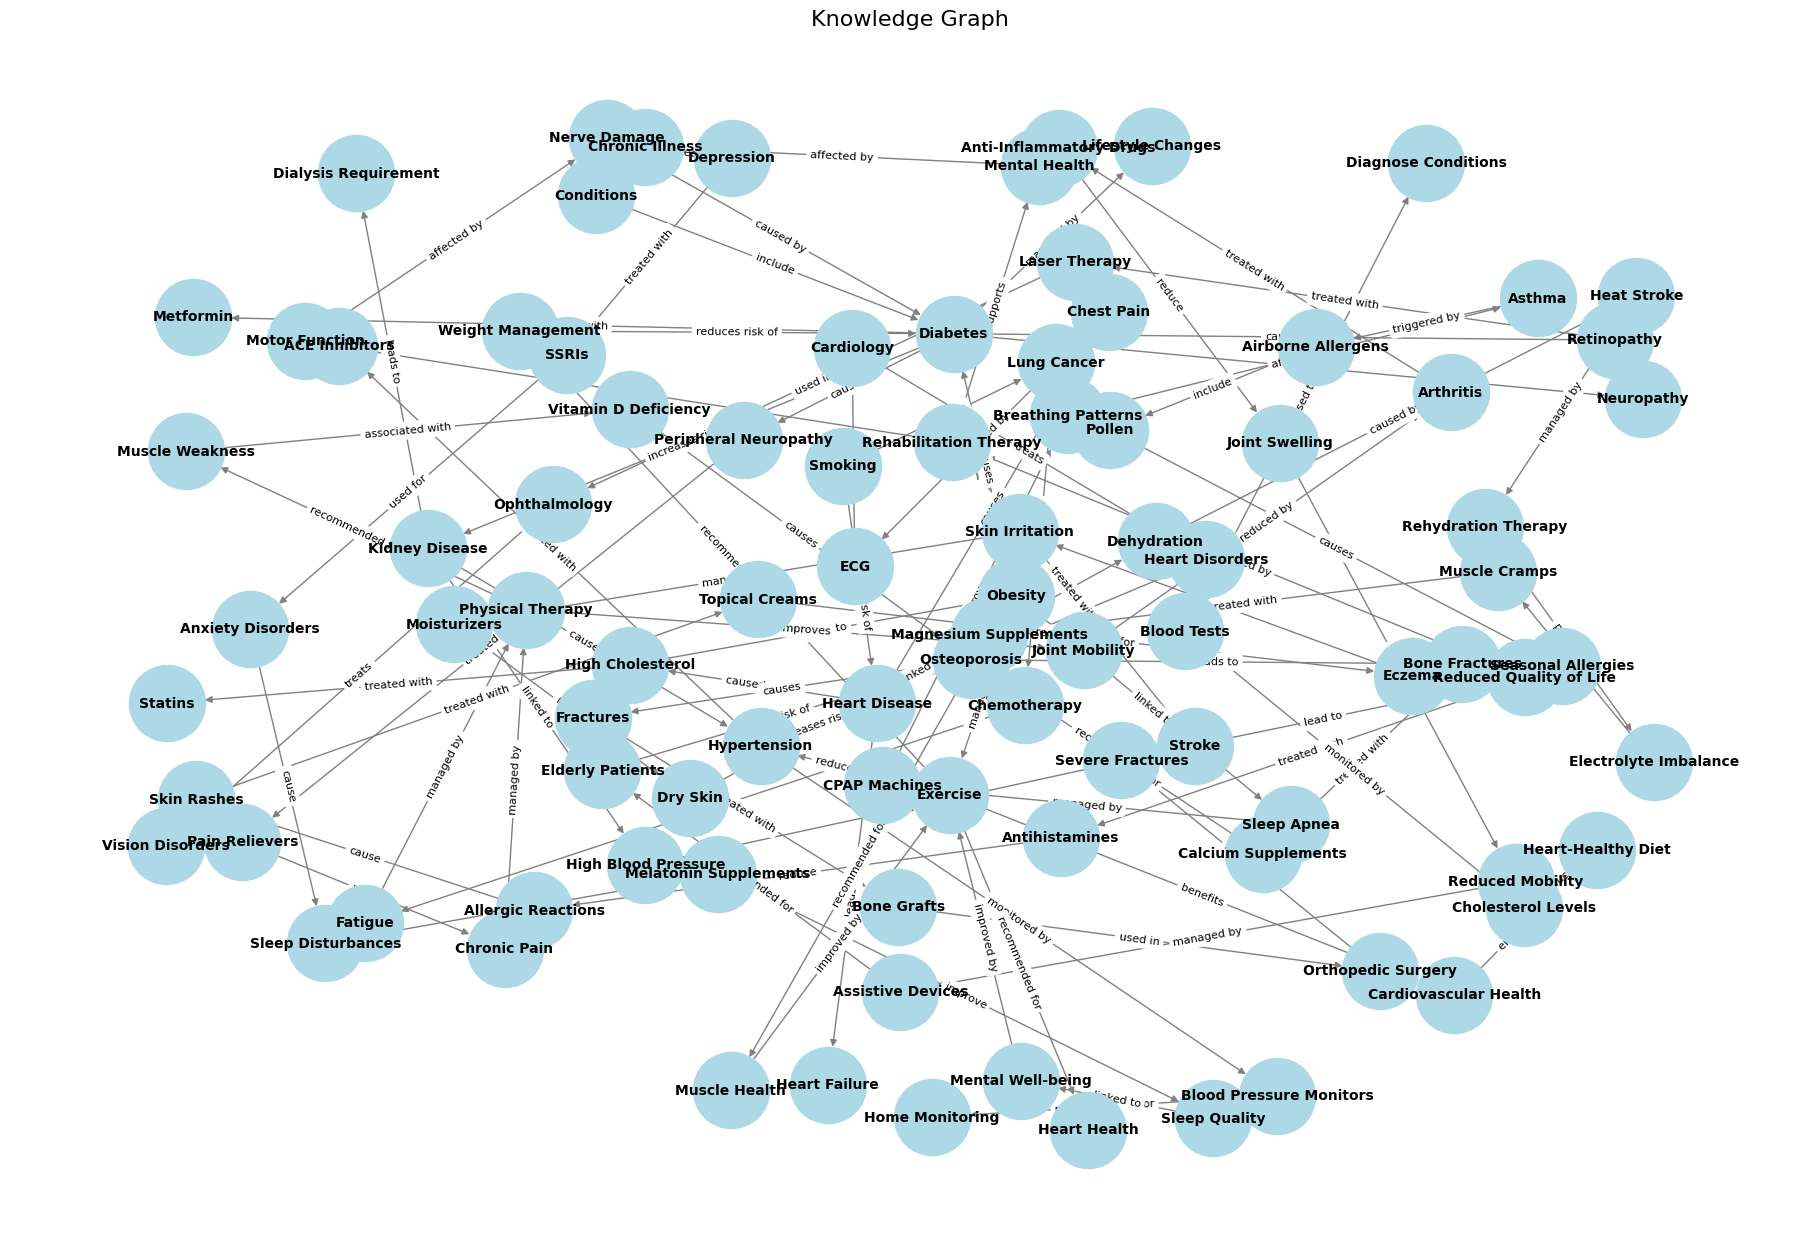

RELdir: {('Diabetes', 'Neuropathy'): 'causes', ('Diabetes', 'Kidney Disease'): 'increases risk of', ('Diabetes', 'Metformin'): 'treated with', ('Diabetes', 'Lifestyle Changes'): 'managed by', ('Kidney Disease', 'Dialysis Requirement'): 'leads to', ('Kidney Disease', 'Hypertension'): 'caused by', ('Hypertension', 'Heart Disease'): 'increases risk of', ('Hypertension', 'ACE Inhibitors'): 'treated with', ('Heart Disease', 'Heart Failure'): 'leads to', ('Heart Disease', 'High Cholesterol'): 'caused by', ('High Cholesterol', 'Statins'): 'treated with', ('High Cholesterol', 'Obesity'): 'linked to', ('Obesity', 'Diabetes'): 'causes', ('Obesity', 'Exercise'): 'managed by', ('Exercise', 'Hypertension'): 'reduces risk of', ('Exercise', 'Heart Health'): 'recommended for', ('Smoking', 'Lung Cancer'): 'causes', ('Smoking', 'Heart Disease'): 'increases risk of', ('Lung Cancer', 'Chemotherapy'): 'treated with', ('Chemotherapy', 'Fatigue'): 'causes', ('Fatigue', 'Physical Therapy'): 'managed by', ('Ph

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Input triplets
triplets = [
    ("Diabetes", "causes", "Neuropathy"),
    ("Diabetes", "increases risk of", "Kidney Disease"),
    ("Diabetes", "treated with", "Metformin"),
    ("Diabetes", "managed by", "Lifestyle Changes"),
    ("Kidney Disease", "leads to", "Dialysis Requirement"),
    ("Kidney Disease", "caused by", "Hypertension"),
    ("Hypertension", "increases risk of", "Heart Disease"),
    ("Hypertension", "treated with", "ACE Inhibitors"),
    ("Heart Disease", "leads to", "Heart Failure"),
    ("Heart Disease", "caused by", "High Cholesterol"),
    ("High Cholesterol", "treated with", "Statins"),
    ("High Cholesterol", "linked to", "Obesity"),
    ("Obesity", "causes", "Diabetes"),
    ("Obesity", "managed by", "Exercise"),
    ("Exercise", "reduces risk of", "Hypertension"),
    ("Exercise", "recommended for", "Heart Health"),
    ("Smoking", "causes", "Lung Cancer"),
    ("Smoking", "increases risk of", "Heart Disease"),
    ("Lung Cancer", "treated with", "Chemotherapy"),
    ("Chemotherapy", "causes", "Fatigue"),
    ("Fatigue", "managed by", "Physical Therapy"),
    ("Physical Therapy", "recommended for", "Muscle Weakness"),
    ("Muscle Weakness", "associated with", "Vitamin D Deficiency"),
    ("Vitamin D Deficiency", "causes", "Osteoporosis"),
    ("Osteoporosis", "leads to", "Bone Fractures"),
    ("Bone Fractures", "treated with", "Calcium Supplements"),
    ("Calcium Supplements", "recommended for", "Osteoporosis"),
    ("Diabetes", "causes", "Retinopathy"),
    ("Retinopathy", "treated with", "Laser Therapy"),
    ("Laser Therapy", "used in", "Ophthalmology"),
    ("Ophthalmology", "treats", "Vision Disorders"),
    ("Kidney Disease", "linked to", "High Blood Pressure"),
    ("High Blood Pressure", "causes", "Stroke"),
    ("Stroke", "treated with", "Rehabilitation Therapy"),
    ("Rehabilitation Therapy", "improves", "Motor Function"),
    ("Motor Function", "affected by", "Nerve Damage"),
    ("Nerve Damage", "caused by", "Diabetes"),
    ("Heart Disease", "causes", "Chest Pain"),
    ("Chest Pain", "diagnosed by", "ECG"),
    ("ECG", "used in", "Cardiology"),
    ("Cardiology", "treats", "Heart Disorders"),
    ("Heart Disorders", "linked to", "Hypertension"),
    ("Hypertension", "monitored by", "Blood Pressure Monitors"),
    ("Blood Pressure Monitors", "recommended for", "Home Monitoring"),
    ("Obesity", "linked to", "Sleep Apnea"),
    ("Sleep Apnea", "managed by", "CPAP Machines"),
    ("CPAP Machines", "improve", "Breathing Patterns"),
    ("Breathing Patterns", "affected by", "Asthma"),
    ("Asthma", "triggered by", "Airborne Allergens"),
    ("Airborne Allergens", "include", "Pollen"),
    ("Pollen", "causes", "Seasonal Allergies"),
    ("Seasonal Allergies", "treated with", "Antihistamines"),
    ("Antihistamines", "reduce", "Allergic Reactions"),
    ("Allergic Reactions", "cause", "Skin Rashes"),
    ("Skin Rashes", "treated with", "Topical Creams"),
    ("Topical Creams", "recommended for", "Eczema"),
    ("Eczema", "causes", "Skin Irritation"),
    ("Skin Irritation", "managed by", "Moisturizers"),
    ("Moisturizers", "reduce", "Dry Skin"),
    ("Dry Skin", "linked to", "Dehydration"),
    ("Dehydration", "caused by", "Heat Stroke"),
    ("Heat Stroke", "managed by", "Rehydration Therapy"),
    ("Rehydration Therapy", "prevents", "Electrolyte Imbalance"),
    ("Electrolyte Imbalance", "causes", "Muscle Cramps"),
    ("Muscle Cramps", "treated with", "Magnesium Supplements"),
    ("Magnesium Supplements", "recommended for", "Muscle Health"),
    ("Muscle Health", "improved by", "Exercise"),
    ("Exercise", "recommended for", "Weight Management"),
    ("Weight Management", "reduces risk of", "Diabetes"),
    ("Diabetes", "causes", "Peripheral Neuropathy"),
    ("Peripheral Neuropathy", "treated with", "Pain Relievers"),
    ("Pain Relievers", "used for", "Chronic Pain"),
    ("Chronic Pain", "managed by", "Physical Therapy"),
    ("Physical Therapy", "improves", "Joint Mobility"),
    ("Joint Mobility", "reduced by", "Arthritis"),
    ("Arthritis", "treated with", "Anti-Inflammatory Drugs"),
    ("Anti-Inflammatory Drugs", "reduce", "Joint Swelling"),
    ("Joint Swelling", "causes", "Reduced Mobility"),
    ("Reduced Mobility", "managed by", "Assistive Devices"),
    ("Assistive Devices", "recommended for", "Elderly Patients"),
    ("Elderly Patients", "at risk of", "Osteoporosis"),
    ("Osteoporosis", "causes", "Fractures"),
    ("Fractures", "treated with", "Bone Grafts"),
    ("Bone Grafts", "used in", "Orthopedic Surgery"),
    ("Orthopedic Surgery", "required for", "Severe Fractures"),
    ("Severe Fractures", "lead to", "Reduced Quality of Life"),
    ("Reduced Quality of Life", "improved by", "Rehabilitation Therapy"),
    ("Rehabilitation Therapy", "supports", "Mental Health"),
    ("Mental Health", "affected by", "Chronic Illness"),
    ("Chronic Illness", "linked to", "Depression"),
    ("Depression", "treated with", "SSRIs"),
    ("SSRIs", "used for", "Anxiety Disorders"),
    ("Anxiety Disorders", "cause", "Sleep Disturbances"),
    ("Sleep Disturbances", "managed by", "Melatonin Supplements"),
    ("Melatonin Supplements", "improve", "Sleep Quality"),
    ("Sleep Quality", "linked to", "Mental Well-being"),
    ("Mental Well-being", "improved by", "Exercise"),
    ("Exercise", "benefits", "Cardiovascular Health"),
    ("Cardiovascular Health", "enhanced by", "Heart-Healthy Diet"),
    ("Heart-Healthy Diet", "reduces", "Cholesterol Levels"),
    ("Cholesterol Levels", "monitored by", "Blood Tests"),
    ("Blood Tests", "used to", "Diagnose Conditions"),
    ("Conditions", "include", "Diabetes"),
]

# Define functions for building the knowledge graph
def BuildKG(triplets):
    # Initialize a directed graph
    G = nx.DiGraph()

    # Dictionary for nodes and their attributes
    NERdir = {}
    RELdir = {}

    # Add nodes and edges from triplets
    for head, relation, tail in triplets:
        G.add_edge(head, tail, label=relation)

        # Map nodes to attributes
        if head not in NERdir:
            NERdir[head] = head
        if tail not in NERdir:
            NERdir[tail] = tail
        RELdir[(head, tail)] = relation

    return G, NERdir, RELdir

# Build the graph
G, NERdir, RELdir = BuildKG(triplets)

# Visualize the graph
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray"
)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Knowledge Graph", fontsize=16)
plt.show()


print("RELdir:", RELdir)

In [37]:
import random

def retrieve_from_graph(query, G, RELdir):
    """
    Retrieves information from the graph based on the query.
    Args:
        query (str): Query string in the format "What does {entity} {relation}?"
        G (networkx.DiGraph): Knowledge graph
        RELdir (dict): Dictionary of relationships
    Returns:
        List of tuples with retrieved relationships
    """
    # Ensure the query format is correct
    if not query.lower().startswith("what does") or not query.endswith("?"):
        return "Invalid query format. Use 'What does {entity} {relation}?'"

    # Extract entity and relation from the query
    try:
        query_words = query[:-1].split()  # Remove the question mark
        entity = query_words[2]  # Extract the entity
        relation_type = " ".join(query_words[3:])  # Extract the relation
    except IndexError:
        return "Invalid query structure. Use 'What does {entity} {relation}?'"

    # Retrieve relevant relationships from the graph
    results = []
    for (head, tail), relation in RELdir.items():
        if head == entity and relation_type.lower() in relation.lower():
            results.append((head, relation, tail))

    return results if results else f"No information found for '{query}'."


# Function to simulate RAG (retrieval + generation)
def generate_answer(query, G, RELdir):
    """
    Simulates a RAG system by retrieving from the knowledge graph and generating an answer.
    Args:
        query (str): Input query
        G (networkx.DiGraph): Knowledge graph
        RELdir (dict): Dictionary of relationships
    Returns:
        str: Generated answer
    """
    retrieval_results = retrieve_from_graph(query, G, RELdir)
    if isinstance(retrieval_results, str):  # If no results found
        return retrieval_results

    # Generate a response
    response = f"Here is what I found for '{query}':\n"
    for head, relation, tail in retrieval_results:
        response += f"  - {head} {relation} {tail}\n"

    # Add a generative twist
    if len(retrieval_results) > 1:
        response += "\nThese results suggest a complex relationship involving the queried entity."
    else:
        response += "\nThis result indicates a direct relationship for your query."

    return response

# Test the RAG system
query = "What does Diabetes cause?"
answer = generate_answer(query, G, RELdir)
print(answer)

query2 = "What does Hypertension increase?"
answer2 = generate_answer(query2, G, RELdir)
print(answer2)

query3 = "What does Smoking cause?"
answer3 = generate_answer(query3, G, RELdir)
print(answer3)


Here is what I found for 'What does Diabetes cause?':
  - Diabetes causes Neuropathy
  - Diabetes causes Retinopathy
  - Diabetes causes Peripheral Neuropathy

These results suggest a complex relationship involving the queried entity.
Here is what I found for 'What does Hypertension increase?':
  - Hypertension increases risk of Heart Disease

This result indicates a direct relationship for your query.
Here is what I found for 'What does Smoking cause?':
  - Smoking causes Lung Cancer

This result indicates a direct relationship for your query.


In [3]:
!pip show sentence-transformers
!pip show huggingface-hub

Name: sentence-transformers
Version: 2.2.2
Summary: Multilingual text embeddings
Home-page: https://github.com/UKPLab/sentence-transformers
Author: Nils Reimers
Author-email: info@nils-reimers.de
License: Apache License 2.0
Location: c:\users\yashna satyan\.conda\envs\spacy_env\lib\site-packages
Requires: huggingface-hub, nltk, numpy, scikit-learn, scipy, sentencepiece, torch, torchvision, tqdm, transformers
Required-by: 
Name: huggingface-hub
Version: 0.20.2
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: c:\users\yashna satyan\.conda\envs\spacy_env\lib\site-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: allennlp, cached-path, datasets, sentence-transformers, transformers


In [50]:
#!pip uninstall sentence-transformers
!pip install sentence-transformers

In [1]:
import sentence_transformers

c:\Users\Yashna Satyan\.conda\envs\spacy_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sentence_transformers.__version__

'2.2.2'

In [45]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def parse_query_with_spacy(query):
    """
    Parses the query to extract the entity and relation using spaCy.
    Args:
        query (str): Input query
    Returns:
        Tuple[str, str]: Extracted entity and relation
    """
    doc = nlp(query)
    entity = None
    relation = None
    
    # Primary extraction using dependency parsing
    for token in doc:
        if token.dep_ == "nsubj":  # Extract the subject (entity)
            entity = token.text
        if token.dep_ == "ROOT" or token.dep_ == "xcomp":  # Extract the main verb (relation)
            relation = token.text

    # Fallback if the primary extraction fails
    if not entity:
        entity = next((token.text for token in doc if token.pos_ == "NOUN"), None)
    if not relation:
        relation = next((token.text for token in doc if token.pos_ == "VERB"), None)

    print(f"Parsed Query - Entity: {entity}, Relation: {relation}")  # Debugging output
    return entity, relation


# Function to retrieve relationships using the hybrid approach
def retrieve_from_graph_hybrid(query, G, RELdir):
    """
    Hybrid approach for retrieving relationships.
    Combines spaCy-based query parsing with substring matching for relation.
    Args:
        query (str): Input query
        G (networkx.DiGraph): Knowledge graph
        RELdir (dict): Dictionary of relationships
    Returns:
        List of tuples with retrieved relationships or a message
    """
    # Parse the query with spaCy
    entity, relation = parse_query_with_spacy(query)
    if not entity or not relation:
        return "Invalid query format or structure. Ensure the query specifies both entity and relation."

    # Retrieve relevant relationships from the graph
    results = []
    for (head, tail), rel in RELdir.items():
        if head == entity and relation.lower() in rel.lower():  # Substring match
            results.append((head, rel, tail))

    return results if results else f"No information found for '{query}'."

# Function to simulate RAG (retrieval + generation)
def generate_answer(query, G, RELdir):
    """
    Simulates a RAG system by retrieving from the knowledge graph and generating an answer.
    Args:
        query (str): Input query
        G (networkx.DiGraph): Knowledge graph
        RELdir (dict): Dictionary of relationships
    Returns:
        str: Generated answer
    """
    retrieval_results = retrieve_from_graph_hybrid(query, G, RELdir)
    if isinstance(retrieval_results, str):  # If no results found
        return retrieval_results

    # Generate a response
    response = f"Here is what I found for '{query}':\n"
    for head, relation, tail in retrieval_results:
        response += f"  - {head} {relation} {tail}\n"

    # Add a generative twist
    if len(retrieval_results) > 1:
        response += "\nThese results suggest a complex relationship involving the queried entity."
    else:
        response += "\nThis result indicates a direct relationship for your query."

    return response

# Example queries to test the hybrid approach
query1 = "What does Diabetes cause?"
query2 = "How does Hypertension increase risk?"
query3 = "What does Smoking cause?"

# Generate and print answers
print(generate_answer(query1, G, RELdir))
print(generate_answer(query2, G, RELdir))
print(generate_answer(query3, G, RELdir))


Parsed Query - Entity: Diabetes, Relation: cause
Here is what I found for 'What does Diabetes cause?':
  - Diabetes causes Neuropathy
  - Diabetes causes Retinopathy
  - Diabetes causes Peripheral Neuropathy

These results suggest a complex relationship involving the queried entity.
Parsed Query - Entity: Hypertension, Relation: increase
Here is what I found for 'How does Hypertension increase risk?':
  - Hypertension increases risk of Heart Disease

This result indicates a direct relationship for your query.
Parsed Query - Entity: Smoking, Relation: cause
Here is what I found for 'What does Smoking cause?':
  - Smoking causes Lung Cancer

This result indicates a direct relationship for your query.


In [41]:
!python -m spacy info



============================== Info about spaCy ==============================

spaCy version    3.3.3                         
Location         c:\Users\Yashna Satyan\.conda\envs\spacy_env\lib\site-packages\spacy
Platform         Windows-10-10.0.22631-SP0     
Python version   3.8.13                        
Pipelines        en_core_web_sm (3.7.1)        



c:\Users\Yashna Satyan\.conda\envs\spacy_env\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7 and may not be 100% compatible with the current version (3.3.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [42]:
!python -m spacy download en_core_web_sm


     --------------------------------------- 12.8/12.8 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstalled en-core-web-sm-3.7.1
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
